<a href="https://colab.research.google.com/github/KunChen-tw/DeepLearning/blob/main/deeplearning1013_Ch4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST with CNN



## Install torchmetrics

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 12.4 MB/s eta 0:00:00


Download MNIST data

In [ ]:
import os
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchmetrics import Accuracy
from torchvision import transforms
from torchvision.datasets import MNIST
torch.manual_seed(16)

PATH_DATASETS = ""
BATCH_SIZE = 1000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Download training data of MNIST
train_ds = MNIST(PATH_DATASETS, train=True, download=True,
                 transform=transforms.ToTensor())
# Download test data of MNIST
test_ds = MNIST(PATH_DATASETS, train=False, download=True,
                 transform=transforms.ToTensor())
print(train_ds.data.shape, test_ds.data.shape)
print(train_ds.targets.shape, test_ds.targets.shape)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:03<00:00, 3181172.56it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 476126.76it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 3733502.45it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 6320679.75it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
torch.Size([60000]) torch.Size([10000])


## Creat model

In [ ]:
# Create model
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1) # explain later
        out = self.fc(out)
        out = F.log_softmax(out, dim=1)
        return out

model = ConvNet().to(device)
print(model)


ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


Training and draw the loss


Epoch 1: [10000 / 60000] (17 %)  Loss: 2.313241
Epoch 1: [20000 / 60000] (33 %)  Loss: 2.317136
Epoch 1: [30000 / 60000] (50 %)  Loss: 2.342534
Epoch 1: [40000 / 60000] (67 %)  Loss: 2.276827
Epoch 1: [50000 / 60000] (83 %)  Loss: 2.230478
Epoch 1: [60000 / 60000] (100 %)  Loss: 2.051173
Epoch 2: [10000 / 60000] (17 %)  Loss: 1.585950
Epoch 2: [20000 / 60000] (33 %)  Loss: 1.121585
Epoch 2: [30000 / 60000] (50 %)  Loss: 0.886556
Epoch 2: [40000 / 60000] (67 %)  Loss: 0.748009
Epoch 2: [50000 / 60000] (83 %)  Loss: 0.618967
Epoch 2: [60000 / 60000] (100 %)  Loss: 0.391603
Epoch 3: [10000 / 60000] (17 %)  Loss: 0.370228
Epoch 3: [20000 / 60000] (33 %)  Loss: 0.336420
Epoch 3: [30000 / 60000] (50 %)  Loss: 0.327119
Epoch 3: [40000 / 60000] (67 %)  Loss: 0.275347
Epoch 3: [50000 / 60000] (83 %)  Loss: 0.281837
Epoch 3: [60000 / 60000] (100 %)  Loss: 0.171966
Epoch 4: [10000 / 60000] (17 %)  Loss: 0.186410
Epoch 4: [20000 / 60000] (33 %)  Loss: 0.200208
Epoch 4: [30000 / 60000] (50 %)  Loss

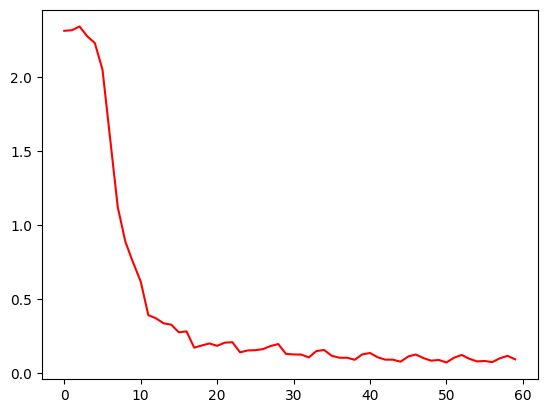

In [ ]:
epochs = 10
lr=0.1
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

model.train()
loss_list = []

for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target) # introduce in next page
        loss.backward()
        optimizer.step()

        if (batch_idx+1) % 10 == 0:
            loss_list.append(loss.item())
            batch = (batch_idx+1) * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * (batch_idx+1) / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f} %)' +
                  f'  Loss: {loss.item():.6f}')

import matplotlib.pyplot as plt

plt.plot(loss_list, 'r')
plt.show()


## Correctness rate

In [ ]:
# Create DataLoader
test_loader = DataLoader(test_ds, shuffle=False, batch_size=BATCH_SIZE)

model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target).item()
        output = model(data)
        # count correctness
        _, predicted = torch.max(output.data, 1)
        correct += (predicted == target).sum().item()

# Average loss
test_loss /= len(test_loader.dataset)
# Show test result
batch = batch_idx * len(data)
data_count = len(test_loader.dataset)
percentage = 100. * correct / data_count
print(f'Average loss: {test_loss:.4f}, Correctness rate: {correct}/{data_count}' +
      f' ({percentage:.2f}%)\n')


Average loss: 0.0001, Correctness rate: 9699/10000 (96.99%)



## Predict test data

In [ ]:
# Predict 20 test data
predictions = []
with torch.no_grad():
    for i in range(20):
        data, target = test_ds[i][0], test_ds[i][1]
        data = data.reshape(1, *data.shape).to(device)
        output = torch.argmax(model(data), axis=-1)
        predictions.append(str(output.item()))

# matching
print('actual    :', test_ds.targets[0:20].numpy())
print('prediction: ', ' '.join(predictions[0:20]))


actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction:  7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4


## Show the probability of the 9th datum

torch.Size([1, 1, 28, 28])
 0~9 predict probability : [[0.   0.   0.   0.96 0.   0.01 0.   0.   0.04 0.  ]]
0~9 predict result : [3]


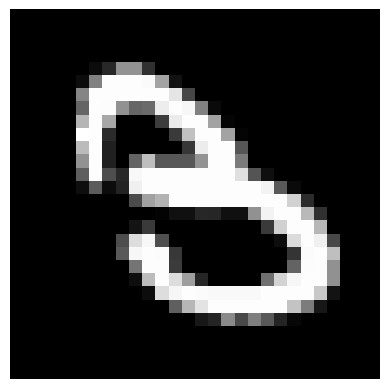

In [ ]:
# Show the probability of the 9th datum
import numpy as np

i=18
data = test_ds[i][0]
data = data.reshape(1, *data.shape).to(device)
print(data.shape)
predictions = torch.softmax(model(data), dim=1)
print(f' 0~9 predict probability : {np.around(predictions.cpu().detach().numpy(), 2)}')
print(f'0~9 predict result : {np.argmax(predictions.cpu().detach().numpy(), axis=-1)}')

X2 = test_ds[i][0]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

# Save model
torch.save(model, 'cnn_model.pth')


## Load model

<ipython-input-11-d59973736ab6>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('cnn_model.pth')


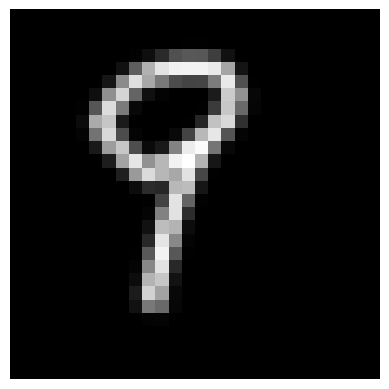

In [ ]:
# Load model
model = torch.load('cnn_model.pth')

from skimage import io
from skimage.transform import resize

no=9
uploaded_file = f'./myDigits/{no}.png'
image1 = io.imread(uploaded_file, as_gray=True)

data_shape = data.shape
image_resized = resize(image1, data_shape[2:], anti_aliasing=True)
X1 = image_resized.reshape(*data_shape) #/ 255.0
# Invert the color, in real handwritten, background is white.
X1 = 1.0-X1

import matplotlib.pyplot as plt

plt.imshow(X1.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
data_shape = X1.shape
print(data_shape)

X1 = torch.FloatTensor(X1).to(device)

# predict
predictions = model(X1)
print(f'actual/prediction: {no} {np.argmax(predictions.detach().cpu().numpy())}')

print(model(X1))


(1, 1, 28, 28)
actual/prediction: 9 8
tensor([[-10.1190,  -3.3556,  -1.4339,  -1.5617,  -6.6165,  -4.2173, -14.0736,
          -3.4225,  -0.7718,  -5.1053]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
# Read the image and turn to monochrome
for i in range(10):
    uploaded_file = f'./myDigits/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    #  Image scaled to (28, 28) size
    image_resized = resize(image1, tuple(data_shape)[2:], anti_aliasing=True)
    X1 = image_resized.reshape(*data_shape)

    # Invert the color, color 0 is white, unlike RGB color coding, its 0 is black
    X1 = 1.0-X1
    X1 = torch.FloatTensor(X1).to(device)

    # predict
    predictions = torch.softmax(model(X1), dim=1)
    print(f'actual/prediction: {i} {np.argmax(predictions.detach().cpu().numpy())}')

